In [2]:
import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data() 

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist

In [5]:
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

In [6]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [7]:
class_names = ["Koszulka","Spodnie","Sweter","Sukienka","Płaszcz","Sandał","Koszula","Tenisówka","Torebka","Trzewik"]

Można w ten sposób : 

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

Mozna też za pomocą listy : 

In [9]:
# model_2 = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(shape=[28,28]),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(300,activation="relu"),
#     tf.keras.layers.Dense(100,activation="relu"),
#     tf.keras.layers.Dense(10,activation="softmax")
# ])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [12]:
hidden1 = model.layers[1]

In [14]:
weights,biases = hidden1.get_weights()

In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train, epochs=30,validation_data=(X_valid,y_valid)) 
# można uzyć argumentu np. validation_split = 0.1 ( 10% ostatnich danych na walidacje )
# argument class_weight nadaje wieksze wagi klasom mniejszościowym, i mniejsze klasom dominującym
# argument sample_weight zwiększa wagi dla wybranych przykładów

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6882 - loss: 0.9728 - val_accuracy: 0.8264 - val_loss: 0.5066
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8240 - loss: 0.5079 - val_accuracy: 0.8368 - val_loss: 0.4559
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8425 - loss: 0.4543 - val_accuracy: 0.8466 - val_loss: 0.4324
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8521 - loss: 0.4234 - val_accuracy: 0.8510 - val_loss: 0.4175
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8598 - loss: 0.4016 - val_accuracy: 0.8532 - val_loss: 0.4051
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8656 - loss: 0.3842 - val_accuracy: 0.8570 - val_loss: 0.3964
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8704 - loss: 0.3698 - val_accuracy: 0.8598 - val_loss: 0.3905
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8748 - loss: 0.3570 - 

In [22]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [30]:
history.history

{'accuracy': [0.7638727426528931,
  0.8301454782485962,
  0.8453636169433594,
  0.8541454672813416,
  0.8614181876182556,
  0.8670363426208496,
  0.87132728099823,
  0.8755454421043396,
  0.8787636160850525,
  0.8819817900657654,
  0.8851818442344666,
  0.8875636458396912,
  0.8903818130493164,
  0.8926363587379456,
  0.8948181867599487,
  0.8972727060317993,
  0.899327278137207,
  0.9014727473258972,
  0.9034727215766907,
  0.905927300453186,
  0.9075454473495483,
  0.9093272686004639,
  0.9112545251846313,
  0.9130363464355469,
  0.9146727323532104,
  0.9162726998329163,
  0.9176727533340454,
  0.9194545745849609,
  0.9207817912101746,
  0.9225999712944031],
 'loss': [0.707203209400177,
  0.4876231849193573,
  0.4424709975719452,
  0.41461309790611267,
  0.3943224549293518,
  0.3779521882534027,
  0.3642166554927826,
  0.3521481454372406,
  0.3412768840789795,
  0.3313753604888916,
  0.32240110635757446,
  0.3142199218273163,
  0.3067467212677002,
  0.2997082769870758,
  0.2931192517

In [31]:
import pandas as pd

In [32]:
df_history = pd.DataFrame(history.history)

In [34]:
df_history.head(5)

,accuracy,loss,val_accuracy,val_loss
0,0.763873,0.707203,0.8264,0.506606
1,0.830145,0.487623,0.8368,0.455875
2,0.845364,0.442471,0.8466,0.432443
3,0.854145,0.414613,0.8510,0.417549
4,0.861418,0.394322,0.8532,0.405064


<Axes: xlabel='Epoka'>

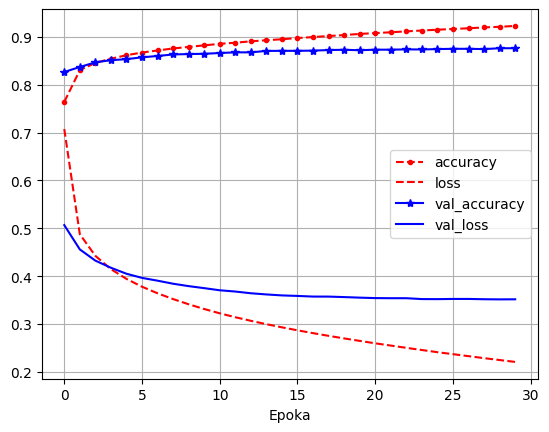

In [44]:
df_history.plot(grid=True,xlabel='Epoka',style=['r--.','r--','b-*','b-'])

Należy pamiętać, że wartośc błędu walidacyjnego jest uzyskiwana nakońcu epoki,  
błąd uczenia jest uzyskiwany przy użyciu średniej kroczącej w trakcie danej epoki

**Keras wznawia uczenie od miejsca, w którym zostało przerwane, wystarczy wywołać metodę fit**

In [45]:
history2 = model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid)) 

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9240 - loss: 0.2178 - val_accuracy: 0.8764 - val_loss: 0.3508
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9262 - loss: 0.2138 - val_accuracy: 0.8766 - val_loss: 0.3506
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9270 - loss: 0.2099 - val_accuracy: 0.8764 - val_loss: 0.3511
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9282 - loss: 0.2064 - val_accuracy: 0.8760 - val_loss: 0.3509
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9300 - loss: 0.2026 - val_accuracy: 0.8764 - val_loss: 0.3538
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9314 - loss: 0.1991 - val_accuracy: 0.8786 - val_loss: 0.3505
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9327 - loss: 0.1955 - val_accuracy: 0.8786 - val_loss: 0.3512
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9342 - loss: 0.1921 - 

<Axes: xlabel='Epoka'>

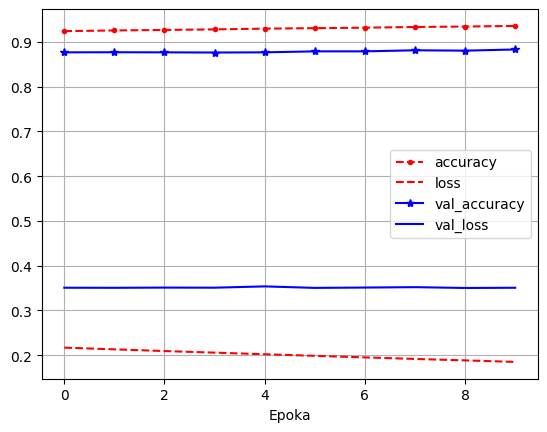

In [47]:
pd.DataFrame(history2.history).plot(grid=True,xlabel='Epoka',style=['r--.','r--','b-*','b-'])

Strojenie Hiperparametrów :  
- zmiana współczynnika uczenia
- zmiana optymalizatora
- liczba warstw, liczba neuronów w warstwie, rodzaj funkcji aktywacji wprowadzanej  
  do każdej warstwy ukrytej
- rozmiar minigrupy, wyznaczanie w metodzie fit(batch_size=32(domyślnie)) 

**Sprawdzanie na zbiorze testowym**

In [48]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8782 - loss: 0.3671


[0.3666622042655945, 0.878000020980835]

**prognozy**

In [49]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.01, 0.  , 0.91],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)